## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


In [8]:
epoch=500
model.fit(x_train, y_train, 
          epochs=epoch, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.9072 - acc: 0.3114 - val_loss: 1.7364 - val_acc: 0.3779
Epoch 2/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.6972 - acc: 0.3945 - val_loss: 1.6279 - val_acc: 0.4267
Epoch 3/500
50000/50000 [==============================] - 1s 30us/step - loss: 1.6047 - acc: 0.4274 - val_loss: 1.6234 - val_acc: 0.4208
Epoch 4/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.5476 - acc: 0.4483 - val_loss: 1.5713 - val_acc: 0.4351
Epoch 5/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.5085 - acc: 0.4622 - val_loss: 1.5241 - val_acc: 0.4588
Epoch 6/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.4627 - acc: 0.4802 - val_loss: 1.5236 - val_acc: 0.4525
Epoch 7/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.4346 - acc: 0.4885 - val_loss: 1.4307 - 

50000/50000 [==============================] - 1s 29us/step - loss: 0.5419 - acc: 0.8063 - val_loss: 2.0101 - val_acc: 0.5091
Epoch 60/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.5302 - acc: 0.8099 - val_loss: 2.0402 - val_acc: 0.5083
Epoch 61/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.5136 - acc: 0.8158 - val_loss: 2.0760 - val_acc: 0.5072
Epoch 62/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.5156 - acc: 0.8144 - val_loss: 2.1004 - val_acc: 0.5069
Epoch 63/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.5082 - acc: 0.8184 - val_loss: 2.1478 - val_acc: 0.5009
Epoch 64/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.4991 - acc: 0.8209 - val_loss: 2.0760 - val_acc: 0.5064
Epoch 65/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.4994 - acc: 0.8195 - val_loss: 2.2347 - val_acc: 0.5016
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2286 - acc: 0.9182 - val_loss: 3.4798 - val_acc: 0.4954
Epoch 119/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.2602 - acc: 0.9060 - val_loss: 3.5111 - val_acc: 0.4860
Epoch 120/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.2299 - acc: 0.9178 - val_loss: 3.5034 - val_acc: 0.5011
Epoch 121/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2745 - acc: 0.9009 - val_loss: 3.4287 - val_acc: 0.4903
Epoch 122/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2390 - acc: 0.9128 - val_loss: 3.5348 - val_acc: 0.5012
Epoch 123/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2316 - acc: 0.9179 - val_loss: 3.5056 - val_acc: 0.4872
Epoch 124/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2448 - acc: 0.9123 - val_loss: 3.5497 - val_acc: 0.4954
Epoch 125/500
50000/

50000/50000 [==============================] - 1s 29us/step - loss: 0.1693 - acc: 0.9412 - val_loss: 4.1224 - val_acc: 0.4963
Epoch 177/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.2027 - acc: 0.9294 - val_loss: 4.2571 - val_acc: 0.4873
Epoch 178/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1538 - acc: 0.9451 - val_loss: 4.2474 - val_acc: 0.4893
Epoch 179/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1313 - acc: 0.9532 - val_loss: 4.2973 - val_acc: 0.4863
Epoch 180/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.1536 - acc: 0.9457 - val_loss: 4.2748 - val_acc: 0.4882
Epoch 181/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1784 - acc: 0.9383 - val_loss: 4.3200 - val_acc: 0.4856
Epoch 182/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2680 - acc: 0.9124 - val_loss: 4.1542 - val_acc: 0.4957
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 0.1093 - acc: 0.9615 - val_loss: 4.6807 - val_acc: 0.4903
Epoch 235/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1308 - acc: 0.9543 - val_loss: 4.7027 - val_acc: 0.4950
Epoch 236/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.1342 - acc: 0.9533 - val_loss: 4.6992 - val_acc: 0.4847
Epoch 237/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1929 - acc: 0.9362 - val_loss: 4.7946 - val_acc: 0.4853
Epoch 238/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.1642 - acc: 0.9448 - val_loss: 4.6257 - val_acc: 0.4894
Epoch 239/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.1137 - acc: 0.9603 - val_loss: 4.6664 - val_acc: 0.4935
Epoch 240/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.0764 - acc: 0.9730 - val_loss: 4.6706 - val_acc: 0.4944
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 0.0487 - acc: 0.9830 - val_loss: 4.8678 - val_acc: 0.4922
Epoch 293/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.2039 - acc: 0.9369 - val_loss: 4.9458 - val_acc: 0.4731
Epoch 294/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.2116 - acc: 0.9336 - val_loss: 4.9084 - val_acc: 0.4875
Epoch 295/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1429 - acc: 0.9523 - val_loss: 4.9376 - val_acc: 0.4880
Epoch 296/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0539 - acc: 0.9813 - val_loss: 4.8665 - val_acc: 0.4978
Epoch 297/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0424 - acc: 0.9863 - val_loss: 4.8760 - val_acc: 0.4981
Epoch 298/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0439 - acc: 0.9855 - val_loss: 4.9956 - val_acc: 0.4911
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 0.1272 - acc: 0.9586 - val_loss: 4.9618 - val_acc: 0.4967
Epoch 351/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0763 - acc: 0.9736 - val_loss: 5.0251 - val_acc: 0.4925
Epoch 352/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0758 - acc: 0.9735 - val_loss: 5.0205 - val_acc: 0.4902
Epoch 353/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0655 - acc: 0.9767 - val_loss: 4.9826 - val_acc: 0.4974
Epoch 354/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1041 - acc: 0.9640 - val_loss: 5.0207 - val_acc: 0.4964
Epoch 355/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1400 - acc: 0.9554 - val_loss: 4.9893 - val_acc: 0.4875
Epoch 356/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.1125 - acc: 0.9624 - val_loss: 5.1325 - val_acc: 0.4913
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 0.1270 - acc: 0.9591 - val_loss: 5.2173 - val_acc: 0.4840
Epoch 409/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.1418 - acc: 0.9563 - val_loss: 5.1928 - val_acc: 0.4870
Epoch 410/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.0784 - acc: 0.9744 - val_loss: 5.2211 - val_acc: 0.4940
Epoch 411/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.0681 - acc: 0.9775 - val_loss: 5.1453 - val_acc: 0.4962
Epoch 412/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0426 - acc: 0.9849 - val_loss: 5.2496 - val_acc: 0.5003
Epoch 413/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0690 - acc: 0.9768 - val_loss: 5.3268 - val_acc: 0.4857
Epoch 414/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1515 - acc: 0.9532 - val_loss: 5.2280 - val_acc: 0.4902
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 1s 30us/step - loss: 0.0360 - acc: 0.9878 - val_loss: 5.3039 - val_acc: 0.4930
Epoch 467/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0802 - acc: 0.9740 - val_loss: 5.3271 - val_acc: 0.4888
Epoch 468/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0970 - acc: 0.9694 - val_loss: 5.3677 - val_acc: 0.4858
Epoch 469/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0706 - acc: 0.9762 - val_loss: 5.2780 - val_acc: 0.4928
Epoch 470/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0680 - acc: 0.9776 - val_loss: 5.2456 - val_acc: 0.4919
Epoch 471/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.1122 - acc: 0.9639 - val_loss: 5.3979 - val_acc: 0.4910
Epoch 472/500
50000/50000 [==============================] - 1s 30us/step - loss: 0.0840 - acc: 0.9739 - val_loss: 5.3149 - val_acc: 0.4893
Epoch 473/500
50000/50000 [=======

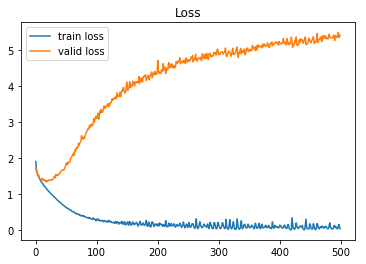

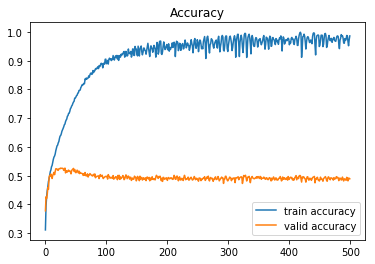

In [10]:

import matplotlib.pyplot as plt



train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [13]:
keras.backend.clear_session()

In [14]:
model = build_mlp()

In [15]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [16]:
epoch=500
model.fit(x_train, y_train, 
          epochs=epoch, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 30us/step - loss: 2.2661 - acc: 0.1629 - val_loss: 2.2255 - val_acc: 0.1999
Epoch 2/500
50000/50000 [==============================] - 1s 28us/step - loss: 2.1954 - acc: 0.2248 - val_loss: 2.1670 - val_acc: 0.2487
Epoch 3/500
50000/50000 [==============================] - 1s 28us/step - loss: 2.1421 - acc: 0.2575 - val_loss: 2.1180 - val_acc: 0.2688
Epoch 4/500
50000/50000 [==============================] - 1s 28us/step - loss: 2.0959 - acc: 0.2764 - val_loss: 2.0746 - val_acc: 0.2865
Epoch 5/500
50000/50000 [==============================] - 1s 29us/step - loss: 2.0544 - acc: 0.2911 - val_loss: 2.0348 - val_acc: 0.3003
Epoch 6/500
50000/50000 [==============================] - 1s 28us/step - loss: 2.0187 - acc: 0.3035 - val_loss: 2.0042 - val_acc: 0.3046
Epoch 7/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.9909 - acc: 0.3106 - val_loss: 1.9797 - 

50000/50000 [==============================] - 1s 30us/step - loss: 1.6526 - acc: 0.4235 - val_loss: 1.6618 - val_acc: 0.4161
Epoch 60/500
50000/50000 [==============================] - 2s 30us/step - loss: 1.6495 - acc: 0.4242 - val_loss: 1.6590 - val_acc: 0.4180
Epoch 61/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.6463 - acc: 0.4245 - val_loss: 1.6573 - val_acc: 0.4190
Epoch 62/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.6432 - acc: 0.4256 - val_loss: 1.6538 - val_acc: 0.4179
Epoch 63/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.6400 - acc: 0.4262 - val_loss: 1.6531 - val_acc: 0.4187
Epoch 64/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.6370 - acc: 0.4283 - val_loss: 1.6496 - val_acc: 0.4213
Epoch 65/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.6340 - acc: 0.4288 - val_loss: 1.6477 - val_acc: 0.4220
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5122 - acc: 0.4716 - val_loss: 1.5435 - val_acc: 0.4560
Epoch 119/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5104 - acc: 0.4721 - val_loss: 1.5383 - val_acc: 0.4565
Epoch 120/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5085 - acc: 0.4743 - val_loss: 1.5391 - val_acc: 0.4584
Epoch 121/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5068 - acc: 0.4744 - val_loss: 1.5357 - val_acc: 0.4564
Epoch 122/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.5051 - acc: 0.4748 - val_loss: 1.5349 - val_acc: 0.4600
Epoch 123/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.5034 - acc: 0.4756 - val_loss: 1.5329 - val_acc: 0.4599
Epoch 124/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.5011 - acc: 0.4764 - val_loss: 1.5311 - val_acc: 0.4595
Epoch 125/500
50000/

50000/50000 [==============================] - 1s 28us/step - loss: 1.4184 - acc: 0.5043 - val_loss: 1.4719 - val_acc: 0.4805
Epoch 177/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4170 - acc: 0.5049 - val_loss: 1.4705 - val_acc: 0.4771
Epoch 178/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4156 - acc: 0.5054 - val_loss: 1.4704 - val_acc: 0.4808
Epoch 179/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4144 - acc: 0.5049 - val_loss: 1.4722 - val_acc: 0.4790
Epoch 180/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4126 - acc: 0.5072 - val_loss: 1.4731 - val_acc: 0.4781
Epoch 181/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4113 - acc: 0.5063 - val_loss: 1.4686 - val_acc: 0.4811
Epoch 182/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.4103 - acc: 0.5065 - val_loss: 1.4655 - val_acc: 0.4810
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 1s 27us/step - loss: 1.3384 - acc: 0.5338 - val_loss: 1.4220 - val_acc: 0.4960
Epoch 235/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.3375 - acc: 0.5334 - val_loss: 1.4280 - val_acc: 0.4977
Epoch 236/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.3357 - acc: 0.5345 - val_loss: 1.4202 - val_acc: 0.4948
Epoch 237/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.3350 - acc: 0.5351 - val_loss: 1.4245 - val_acc: 0.4920
Epoch 238/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.3337 - acc: 0.5347 - val_loss: 1.4184 - val_acc: 0.4976
Epoch 239/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.3320 - acc: 0.5359 - val_loss: 1.4196 - val_acc: 0.4956
Epoch 240/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.3313 - acc: 0.5357 - val_loss: 1.4221 - val_acc: 0.4961
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 1s 27us/step - loss: 1.2684 - acc: 0.5572 - val_loss: 1.3965 - val_acc: 0.5051
Epoch 293/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.2668 - acc: 0.5576 - val_loss: 1.4211 - val_acc: 0.4959
Epoch 294/500
50000/50000 [==============================] - 1s 29us/step - loss: 1.2668 - acc: 0.5587 - val_loss: 1.4029 - val_acc: 0.5075
Epoch 295/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.2654 - acc: 0.5563 - val_loss: 1.3818 - val_acc: 0.5078
Epoch 296/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.2636 - acc: 0.5583 - val_loss: 1.3945 - val_acc: 0.5059
Epoch 297/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.2624 - acc: 0.5596 - val_loss: 1.3930 - val_acc: 0.5048
Epoch 298/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.2616 - acc: 0.5586 - val_loss: 1.3924 - val_acc: 0.5049
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 1s 27us/step - loss: 1.2053 - acc: 0.5792 - val_loss: 1.3793 - val_acc: 0.5061
Epoch 351/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.2028 - acc: 0.5806 - val_loss: 1.3629 - val_acc: 0.5169
Epoch 352/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.2019 - acc: 0.5808 - val_loss: 1.3813 - val_acc: 0.5060
Epoch 353/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.2010 - acc: 0.5817 - val_loss: 1.3709 - val_acc: 0.5124
Epoch 354/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1997 - acc: 0.5812 - val_loss: 1.3637 - val_acc: 0.5196
Epoch 355/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1985 - acc: 0.5809 - val_loss: 1.3752 - val_acc: 0.5104
Epoch 356/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1973 - acc: 0.5809 - val_loss: 1.3907 - val_acc: 0.5105
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 1s 27us/step - loss: 1.1434 - acc: 0.6015 - val_loss: 1.3431 - val_acc: 0.5269
Epoch 409/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1434 - acc: 0.6011 - val_loss: 1.3844 - val_acc: 0.5129
Epoch 410/500
50000/50000 [==============================] - 1s 26us/step - loss: 1.1422 - acc: 0.6034 - val_loss: 1.3536 - val_acc: 0.5212
Epoch 411/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1408 - acc: 0.6021 - val_loss: 1.3440 - val_acc: 0.5247
Epoch 412/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1403 - acc: 0.6029 - val_loss: 1.3585 - val_acc: 0.5228
Epoch 413/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.1389 - acc: 0.6038 - val_loss: 1.3512 - val_acc: 0.5213
Epoch 414/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.1364 - acc: 0.6033 - val_loss: 1.3569 - val_acc: 0.5235
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 1s 27us/step - loss: 1.0876 - acc: 0.6206 - val_loss: 1.3336 - val_acc: 0.5275
Epoch 467/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.0841 - acc: 0.6231 - val_loss: 1.3420 - val_acc: 0.5238
Epoch 468/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.0839 - acc: 0.6223 - val_loss: 1.3562 - val_acc: 0.5222
Epoch 469/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.0834 - acc: 0.6229 - val_loss: 1.3576 - val_acc: 0.5195
Epoch 470/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.0835 - acc: 0.6233 - val_loss: 1.3404 - val_acc: 0.5273
Epoch 471/500
50000/50000 [==============================] - 1s 27us/step - loss: 1.0814 - acc: 0.6229 - val_loss: 1.3433 - val_acc: 0.5247
Epoch 472/500
50000/50000 [==============================] - 1s 28us/step - loss: 1.0804 - acc: 0.6239 - val_loss: 1.3454 - val_acc: 0.5282
Epoch 473/500
50000/50000 [=======

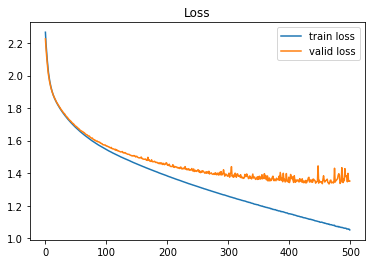

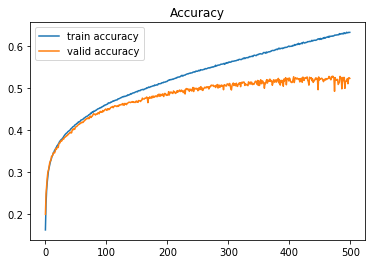

In [17]:

import matplotlib.pyplot as plt



train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()